In [1]:
"""
Problem Set 3
Qutantitative Macro

Value Function Iteration with exogenous labour using continuous methods
"""

'\nProblem Set 3\nQutantitative Macro\n\nValue Function Iteration with exogenous labour using continuous methods\n'

In [2]:
import numpy as np
from scipy.optimize import minimize, fminbound
import matplotlib.pyplot as plt

import os
#os.chdir("path")

In [3]:
kMin = 2.8
kMax = 4
kNum = 200
kGrid = np.linspace(kMin, kMax, kNum)

theta = 0.67
delta = 0.13
beta = 0.98

In [4]:
"""
Utilise a piecewise linear interpolate to interpolate for the initial guess of the value function.
My initial guess was that the image is the 0 for all k
"""
wInital = np.zeros(kNum)
w = lambda k: np.interp(k, kGrid, wInital)

In [5]:
%%time
g = []
V1 = np.zeros(kNum)
for idk, k in enumerate(kGrid):
    k = k

    sol = fminbound(lambda kPrime: -(np.log(k**(1-theta) + (1-delta)*k - kPrime) + beta * w(kPrime)),
                    kMin, kMax , full_output=True)

    g.append(sol[0])
    V1[idk] = -(sol[1])


w = lambda k: np.interp(k, kGrid, V1)
g = []
V2 = np.zeros(kNum)
for idk, k in enumerate(kGrid):
    k = k

    sol = fminbound(lambda kPrime: -(np.log(k**(1-theta) + (1-delta)*k - kPrime) + beta * w(kPrime)),
                    kMin, kMax , full_output=True)

    g.append(sol[0])
    V2[idk] = -(sol[1])

OptimalPath = [V1, V2]

while np.linalg.norm(V2 - V1) > 10**-4:

    w = lambda k: np.interp(k, kGrid, V2)
    g = []
    V2 = np.zeros(kNum)
    for idk, k in enumerate(kGrid):
        k = k

        sol = fminbound(lambda kPrime: -(np.log(k**(1-theta) + (1-delta)*k - kPrime) + beta * w(kPrime)),
                        kMin, kMax , full_output=True)

        g.append(sol[0])
        V2[idk] = -(sol[1])

    OptimalPath.append(V2)
    V2 = OptimalPath[-1]
    V1 = OptimalPath[-2]

    niter = niter+1

NameError: name 'niter' is not defined

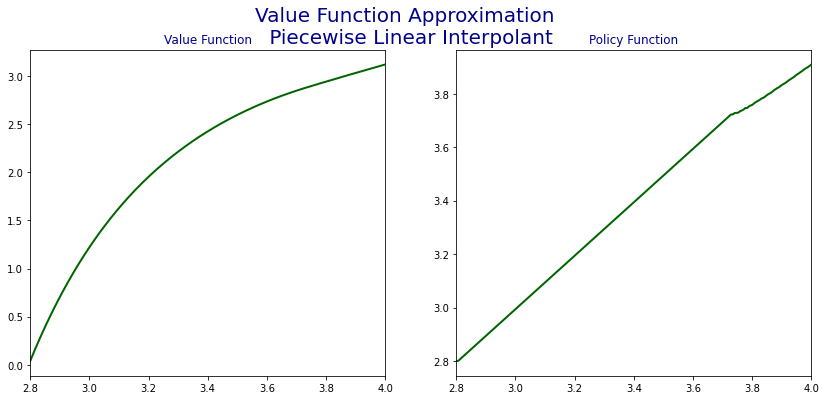

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, facecolor="w", figsize=(14,6))
fig.suptitle("Value Function Approximation \n Piecewise Linear Interpolant", fontsize=20, c="darkblue")
ax1.plot(kGrid, V2, lw=2, c="darkgreen")
ax1.set_title("Value Function",c="darkblue")
ax1.set_xlim((kMin, kMax))

ax2.plot(kGrid, g, lw=2,c="darkgreen")
ax2.set_title("Policy Function",c="darkblue")
ax2.set_xlim((kMin, kMax))
fig.savefig("Continuous Methods")

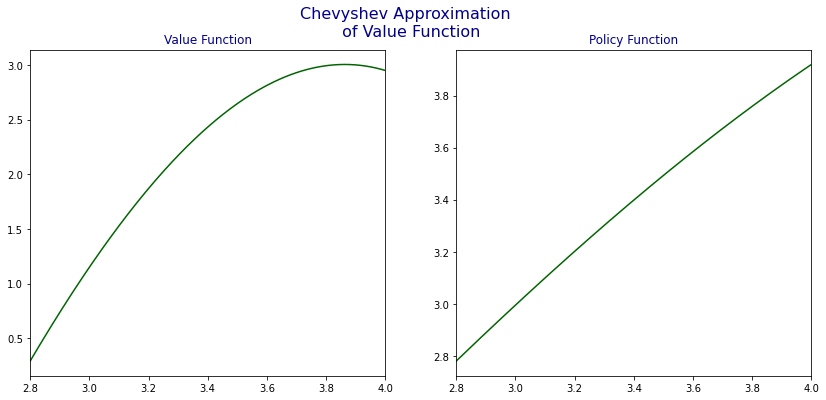

In [7]:
def Chevyshev(Y):
    """
    A function to perform Chevyshev regression
    Returns: Chevyshev coefficients, function defined along kGrid
    """

    n = 6               # degree of polynomials
    rk = [-np.cos((2 * k - 1) * np.pi / (2*kNum)) for k in kGrid]  # roots of m degree polynomials      # upper bound on interval
    xk = [(rk+1)*((kMax-kMin) / 2) + kMin for rk in rk] #the Chebyshev nodes# Evaluate the function at these nodes
    kin = [(2*(k-kMin)/(kMax-kMin)-1) for k in kGrid]


    Tx = np.zeros((kNum, n+1))
    Tx[:, 1] = np.ones(kNum)
    Tx[:, 2] = kin
    for i in range(3, n+1):
        Tx[:, i] = np.multiply(2, xk) * (Tx[:, i-1] - Tx[:, i-2])


    coeff = np.dot(np.linalg.pinv(np.dot(Tx.transpose(), Tx)), np.dot(Tx.transpose(), Y) )

    V = np.dot(Tx, coeff)

    return coeff, V


coeff, V = Chevyshev(V2)
coeff, G = Chevyshev(g)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, facecolor="w", figsize=(14,6))
plt.suptitle("Chevyshev Approximation \n of Value Function", fontsize=16, c="darkblue")
ax1.plot(np.linspace(kMin, kMax, kNum), V, c="darkgreen")
ax1.set_xlim((kMin, kMax))
ax1.set_title("Value Function",c="darkblue")

ax2.plot(np.linspace(kMin, kMax, kNum), G, c="darkgreen")
ax2.set_xlim((kMin, kMax))
ax2.set_title("Policy Function",c="darkblue")
fig.savefig("Chevyshev")